#### Описание датасета
Был выбран датасет с данными о 50 самых продаваемых книгах на Амазоне в период с 2009 по 2019 год. Этот датасет включает в себя данные, описанные в разделе ниже.\
Ссылка на датасет: `https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019`\
Реальные данные для датасета автор взял с сайта Amazon.

##### Описание столбцов:

<pre>
+----------------------------------------------------------+
| Название    | Тип данных | Описание                      |
|-------------+------------+-------------------------------|
| Name        | object     | Название книги                |
| Author      | object     | Автор книги                   |
| User Rating | float64    | Пользовательская оценка книги |
| Reviews     | int64      | Количество отзывов о книге    |
| Price       | int64      | Цена книги                    |
| Year        | int64      | Год продажи книги             |
| Genre       | object     | Жанр книги                    |
+----------------------------------------------------------+
</pre>

Будем рассматривать только столбцы с числовыми типами данных `float64` и `int64`.

#### Цели лабораторной работы
Провести исследование датасета\
Найти среднее значение и СКО для каждого столбца датасета\
Исследовать корреляцию между значениями\
Построить гистограммы для визуализации полученных данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
data = pd.read_csv("./bestsellers_with_categories.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### AVERAGE VALUES

In [4]:
numeric_data = data.select_dtypes(include=["int64", "float64"])
numeric_data.mean().round(decimals=2)

User Rating        4.62
Reviews        11953.28
Price             13.10
Year            2014.00
dtype: float64

#### STD VALUES

In [5]:
numeric_data.std().round(decimals=2)

User Rating        0.23
Reviews        11731.13
Price             10.84
Year               3.17
dtype: float64

#### HISTOGRAM

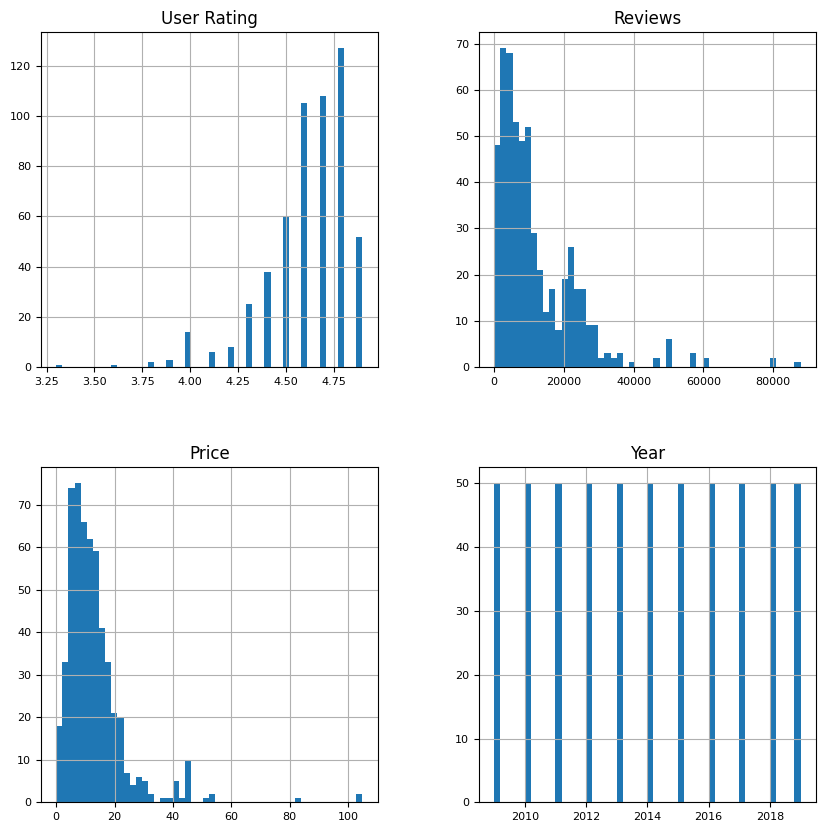

In [6]:
histogram = numeric_data.hist(xlabelsize=8, ylabelsize=8, figsize=(10, 10), bins=50)

#### OUTLIER

In [7]:
numeric_data_length = len(numeric_data)
for column in numeric_data.columns:
    wo_outlier = numeric_data[column][np.abs(scipy.stats.zscore(numeric_data[column])) < 2]
    print(f"{column:<12} {numeric_data_length - len(wo_outlier):<2} of {numeric_data_length}")

User Rating  27 of 550
Reviews      20 of 550
Price        24 of 550
Year         0  of 550


#### MISSING VALUES

In [8]:
numeric_data.isnull().sum()

User Rating    0
Reviews        0
Price          0
Year           0
dtype: int64

#### SCATTER MATRIX

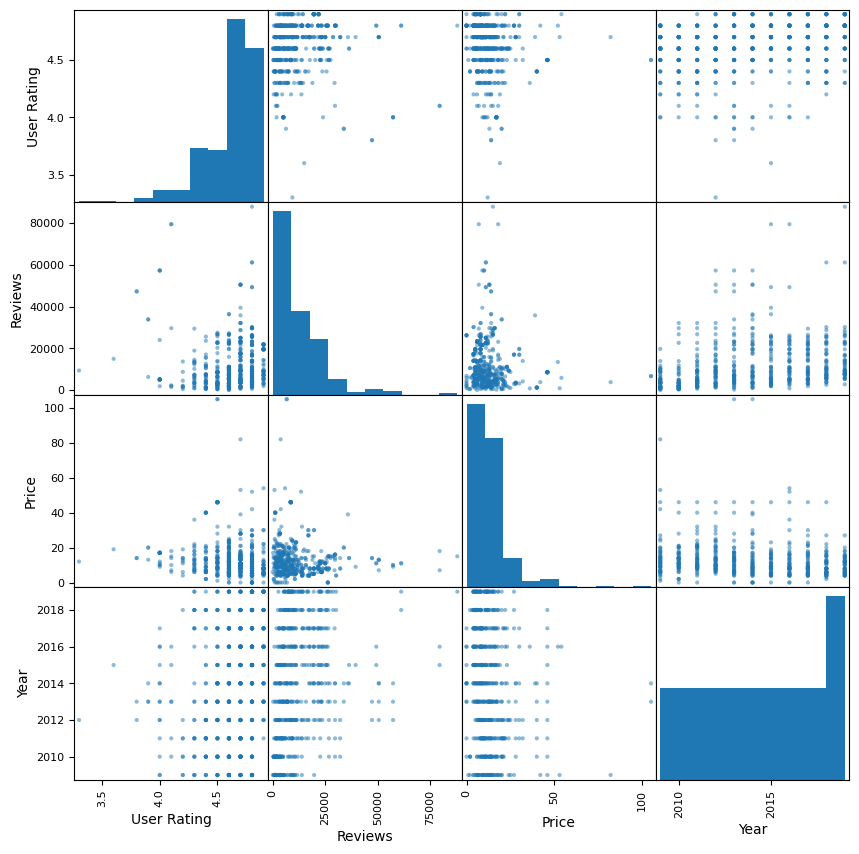

In [9]:
scatter_matrix = pd.plotting.scatter_matrix(numeric_data, figsize=(10, 10))

#### HIGH_CORRELATION

In [10]:
correlation_matrix = numeric_data.corr()
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.7]
high_correlation

,User Rating,Reviews,Price,Year
User Rating,1.0,NaN,NaN,NaN
Reviews,NaN,1.0,NaN,NaN
Price,NaN,NaN,1.0,NaN
Year,NaN,NaN,NaN,1.0


#### CORRELATION MATRIX

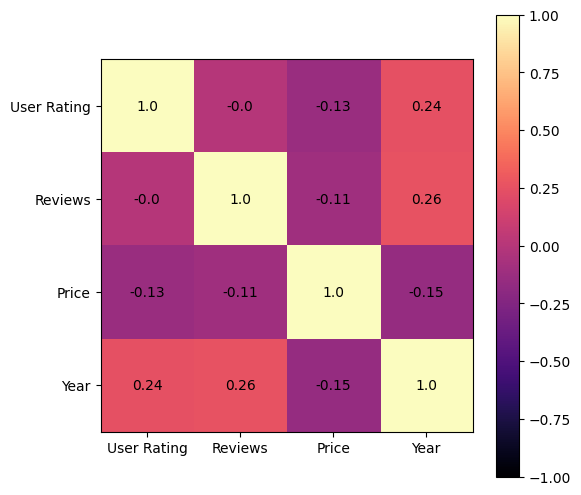

In [11]:
plt.figure(figsize=(6, 6))

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

correlation_plot = plt.imshow(correlation_matrix, cmap="magma", vmin=-1, vmax=1)

plt.colorbar(correlation_plot)

for (x, y), value in np.ndenumerate(correlation_matrix.values):
    plt.text(x, y, round(value, 2), ha="center", va="center", color="black")

plt.show()

#### Анализ корреляции
По матрице графиков рассеивания и тепловой матрице можем наглядно определить характер и степень корреляции.
По степени корреляцию обычно разделяют на сильную, среднюю и слабую (ещё корреляция может отсутствовать), а по характеру - на прямую и обратную.
Так, высокой считается корреляция от 0,7 до 1 по модулю, средней - от 0,3 до 0,7 по модулю, слабой - от 0,1 до 0,3 по модулю, если корреляция меньше 0,1 по модулю, то она отсутствует.
Прямой считается корреляция значения которой больше 0, обратной - меньше 0.
1) Высокая корреляция:\
Отсутствует
2) Средняя корреляция:\
Отсутствует
3) Слабая корреляция:\
`User Rating` и `Price`, обратная, это может быть связано с тем, что при увеличении цены на книгу, пользовательский рейтинг уменьшается, но т.к. корреляция слабая, эти параметры практически не влияют друг на друга.\
`User Rating` и `Year`, прямая, это может быть связано с тем, что, с развитием интернет технологий, у пользователей появилось больше возможностей высказывать своё мнение, но т.к. корреляция слабая, эти параметры практически не влияют друг на друга.\
`Reviews` и `Price`, обратная, то же, что для `User Rating` и `Price`.\
`Reviews` и `Year`, прямая, то же, что для `User Rating` и `Year`.\
`Price` и `Year`, обратная, это может быть связано с тем, что, с развитием интернет технологий, у большего количества пользователей появилась возможность покупать книги через интернет, поэтому компания увеличивает производство, чтобы удовлетворить спрос, что в итоге уменьшает цену за один экземпляр, но т.к. корреляция слабая, эти параметры практически не влияют друг на друга.
4) Корреляция отсутствует:\
`Reviews` и `User Rating`, параметры никак не влияют друг на друга.

#### Выводы
В ходе лабораторной работы был исследован датасет, содержащий информацию о наиболее популярных книгах в период с 2009 по 2019 год.\
Удалось узнать информацию о среднем значении по каждому столбцу, найти выбросы и построить гистограммы для них.\
Также определить корреляцию между параметрами и проанализировать полученные результаты.